In [1]:
from data.generate_data import generate_data
import yaml
from os.path import join

from predictors import MarginalPredictor, ProposedPredictor, OptimalPredictor, ImputedPredictor
from evaluation import compute_zero_shot_loss, visualize_zero_shot
import numpy as np
import torch
import random

In [2]:
EXPERIMENT_BASE_DIR = "./experiments"
EXPERIMENT = "Polynomial"

with open(join(EXPERIMENT_BASE_DIR, "configs.yml"), "r") as f:
    settings = yaml.safe_load(f)


In [3]:
# Fixed seed
def set_all_seeds(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

set_all_seeds(42)
# Generate Dataset
dataset = generate_data(EXPERIMENT_BASE_DIR, EXPERIMENT, settings["dataset"])

In [4]:
reference_predictor = OptimalPredictor()
proposed_predictor = ProposedPredictor()
marginal_predictor = MarginalPredictor()
imputation_predictor = ImputedPredictor()

reference_predictor.fit(dataset.data_source, dataset.data_target)
marginal_predictor.fit(dataset.data_source, dataset.data_target)
proposed_predictor.fit(dataset.data_source, dataset.data_target)
imputation_predictor.fit(dataset.data_source, dataset.data_target)

Training neural network to estimate a conditional mean
Epoch: 2, Loss: 0.01841197907924652
Epoch: 4, Loss: 0.018330536782741547
Epoch: 6, Loss: 0.018638117238879204
Epoch: 8, Loss: 0.017936531454324722
Epoch: 10, Loss: 0.018376963213086128
Test Loss: tensor(0.0213)
Training neural network to estimate a conditional mean
Epoch: 2, Loss: 1.4271808862686157
Epoch: 4, Loss: 1.4252982139587402
Epoch: 6, Loss: 1.4239251613616943
Epoch: 8, Loss: 1.4233753681182861
Epoch: 10, Loss: 1.42302668094635
Test Loss: tensor(1.3997)
Training neural network to estimate a conditional mean
Epoch: 2, Loss: 1.4280625581741333
Epoch: 4, Loss: 1.4251899719238281
Epoch: 6, Loss: 1.4237558841705322
Epoch: 8, Loss: 1.4227491617202759
Epoch: 10, Loss: 1.4225903749465942
Test Loss: tensor(1.3993)
Training neural network to estimate a conditional skew
Epoch: 2, Loss: 1.0001602172851562
Epoch: 4, Loss: 1.0005440711975098
Epoch: 6, Loss: 1.0005346536636353
Epoch: 8, Loss: 1.0000189542770386
Epoch: 10, Loss: 1.00023353

In [6]:
# compute zero-shot loss
predictors_dict = {"Proposed": proposed_predictor}
predictors_dict["Optimal"] = reference_predictor
predictors_dict["Marginal"] = marginal_predictor
predictors_dict["MeanImputed"] = imputation_predictor
compute_zero_shot_loss(reference_predictor, predictors_dict, dataset.data_target, num_samples=1000)

(1000, 3)
{'Proposed': 0.010683672, 'Optimal': 0.0, 'Marginal': 1.4882114, 'MeanImputed': 1.4840299}


{'Proposed': 0.010683672,
 'Optimal': 0.0,
 'Marginal': 1.4882114,
 'MeanImputed': 1.4840299}

Visualizing Proposed predictor


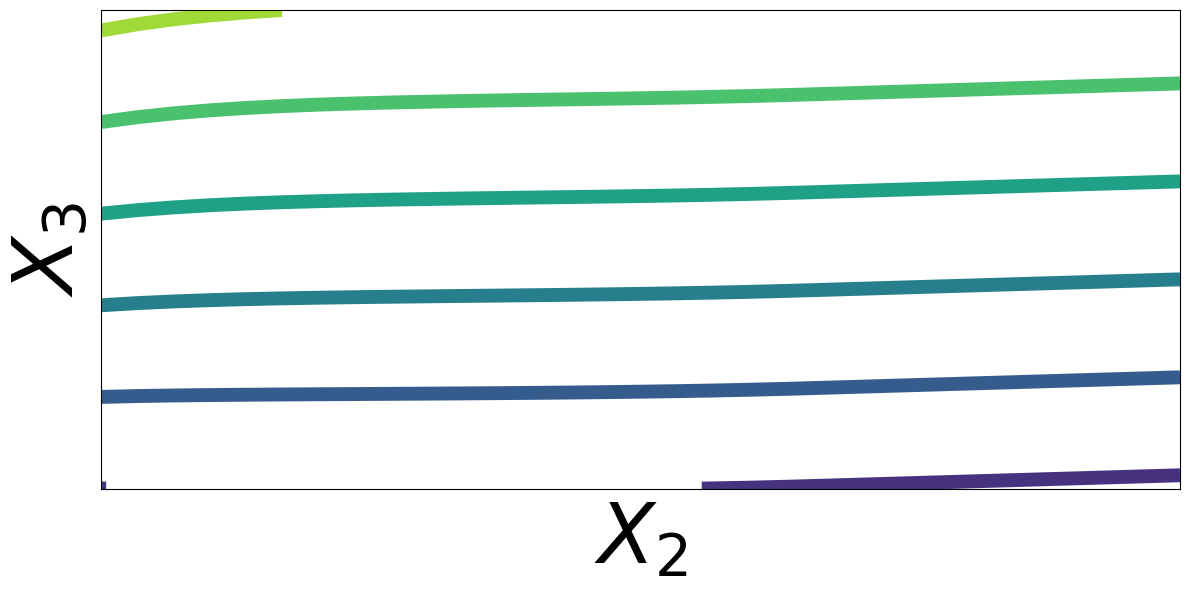

Visualizing Optimal predictor


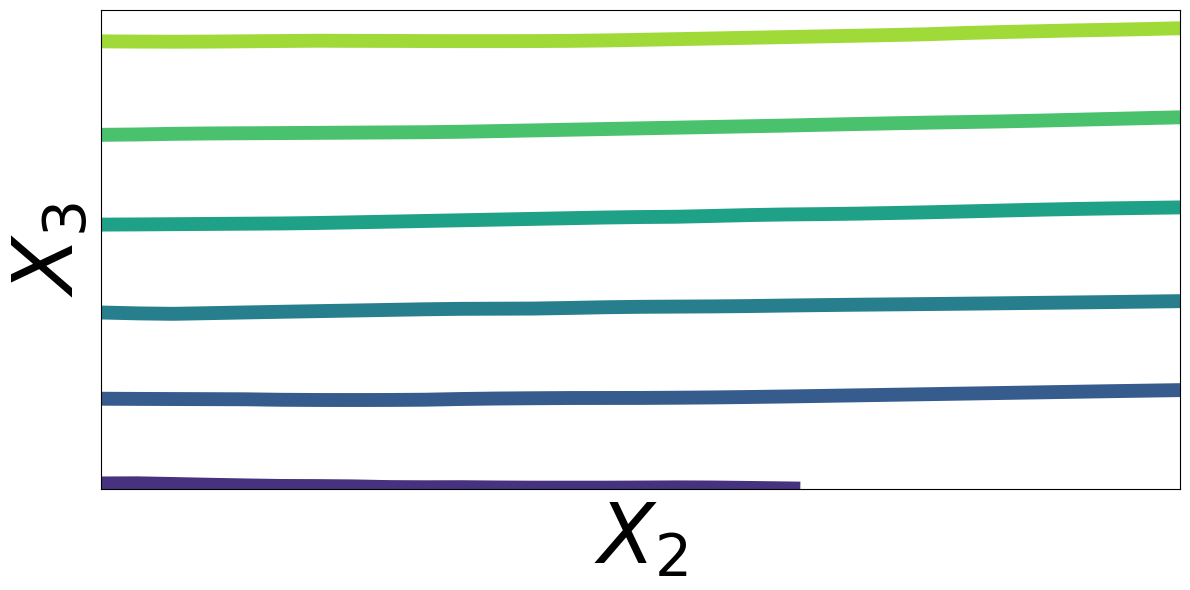

Visualizing Marginal predictor


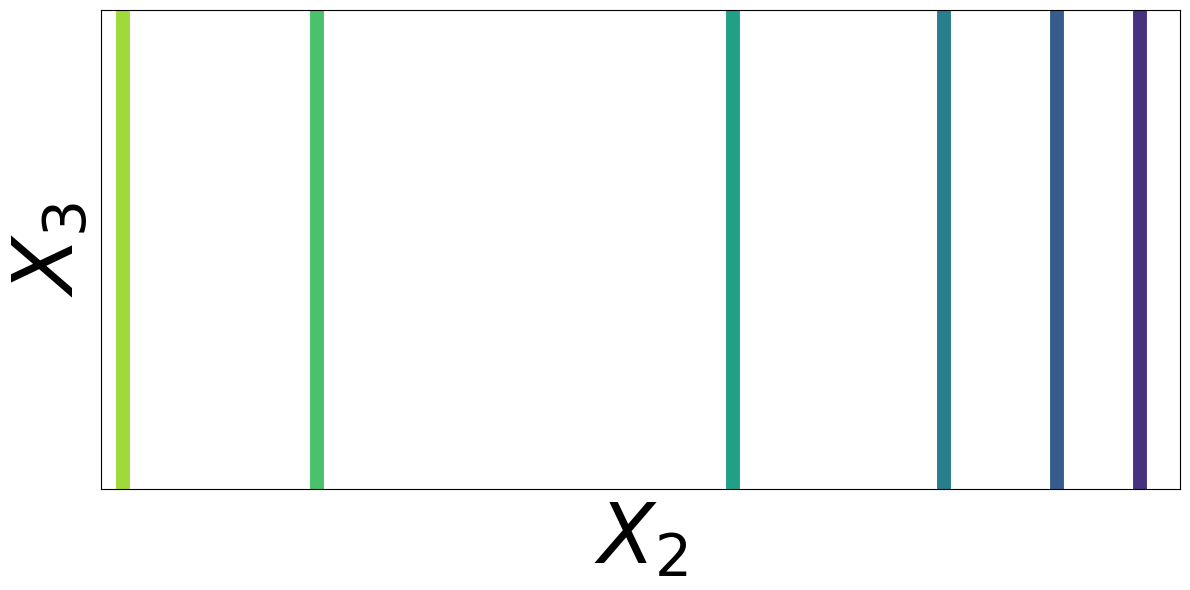

Visualizing MeanImputed predictor
(961, 3)


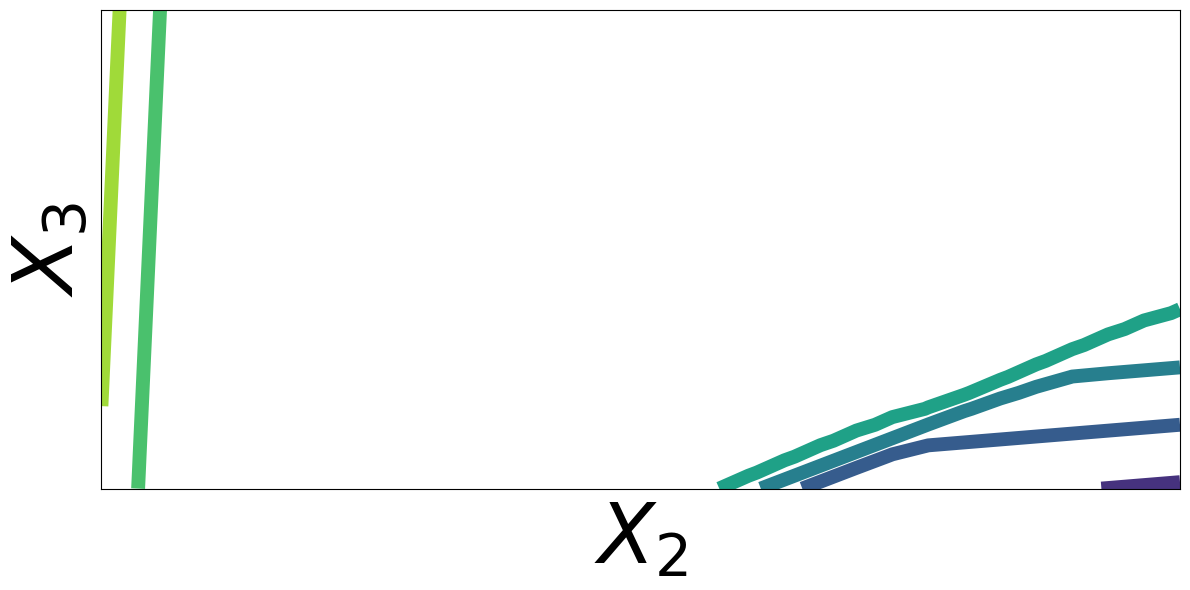

In [7]:
visualize_zero_shot(
    predictors_dict, dataset.data_target, save_dir=join(EXPERIMENT_BASE_DIR, EXPERIMENT), num_samples=1000
)